#Value Function Approximation

Mario Fiorino

##Introduzione

Problema:

Come possiamo estendere i metodi RL tabulari (look-up table), che si basano su una rappresentazione discreta e completa dello spazio di stato, a problemi con spazi di stato arbitrariamente grandi; ad esempio come gestire giochi come Go, che hanno $10^{170}$ stati?

I requisiti di memoria per archiviare una tabelle di tali dimensioni sembrano irrealizzabili; inoltre, visitare adeguatamente ciascuna coppia stato-azione richiede un tempo enorme.


Una risposta:

Una chiave per superare questo limite è combinare l'RL con tecniche di approssimazione di funzioni (in pratica : si utilizza una funzione che approssima il valore di ogni stato. Questa funzione può essere appresa da dati di esempio, utilizzando tecniche di apprendimento supervisionato).


Obiettivo del notebook:

Sostituire le rappresentazioni tabulari della funzione valore (value-fuction) utilizzando approssimatori di funzioni, come le reti neurali.

$\;$

Note:

1.

Esistono diversi tipi di approssimatori di funzioni che possono essere utilizzati nel RL, tra cui: la combinazioni lineari di features,le Neural network, i Decision tree, il Nearest neighbour, le Basi di Fourier/wavelet (Per maggiori info vedi Sutton & Barto, 2018, PDF: 222-257 ).


I metodi più comuni e promettenti sono quelli che utilizzano l’approssimazione di funzioni parametrizzate, in cui la politica è parametrizzata da un vettore dei pesi $\vec{w}$.
Tra l'altro, questi metodi permettono di rappresentare la funzione valore in modo scalabile. Tuttavia, è importante notare che introducono un certo grado di incertezza (dobbiamo accontentarci di una soluzione approssimativa)



2.

L'utilizzo di tecniche di approssimazione di funzioni all'interno del RL permette di estenderne l'applicazione a problemi con informazioni incomplete sullo stato del sistema (problemi parzialmente osservabili).

$\;$

Ref

Reinforcement Learning: An Introduction -
Richard S. Sutton and Andrew G. Barto, Second Edition - MIT Press, Cambridge, 2018.

Corso di David Silver:
https://www.davidsilver.uk/wp-content/uploads/2020/03/FA.pdf

##On-policy Prediction - Stochastic-gradient methods

Per individuare i valori ottimali del "weights vector" $\vec{w}$ , ci si affida principalmente a diverse varianti dell' algoritmo: Stochastic gradient descent (SGD).

$\;$

Componenti essenziali:

"Weights vector", indicatco con $\vec{w}$ = $(w_1, w_2, ... w_d)^{\intercal} $ ; in pratica è un vettore colonna che contiene il valore dei pesi. Nota, affinché uso di queste metodologie abbiano un senso, le dimensioni $d$ sono considerevolmente inferiori rispetto all'intera dimensione dello spazio degli stati.

$v̂(s,\vec{w})$ è "approximate value function", in funzione degli stati e dei pesi, ed è differenziabile $\vec{w}$ rispetto a in tutti gli stati

$v_\pi(s)$ è il "true value function", il nostro target. Di fatto sconosciuto

$\;$

Idea di base dei metodi SGD:

Aggiornare i pesi, dopo ogni esempio, per ridurrebbe l’errore:

$w_{t+1} \doteq \vec{w_t} + α [v_\pi(s_t) - v̂(s_t,\vec{w_t}) ] \nabla_\vec{w} v̂(s_t,\vec{w_t}) $

dove:

Learning rate:  $ α > 0 $

$ \nabla_\vec{w} v̂(s_t,\vec{w_t}) $ è il vettore gradiente rispetto $\vec{w}$. In pratica un vettore colonna delle derivate parziali rispetto alle componenti del vettore $\vec{w}$ : $( \frac{\partial v̂(s_t,\vec{w_t}) }{\partial w_1},\frac{\partial v̂(s_t,\vec{w_t}) }{\partial w_2} ,...,\frac{\partial v̂(s_t,\vec{w_t}) }{\partial w_d})^\intercal $


$\;$

Convergenza:

Nel caso in cui $\alpha$ diminusce nel tempo in modo da rispettare le condizioni di "standard stochastic approximation" (viste nei notebbok precedenti e descritte nel testo Sutton & Barto, 2018,  PDF 55 - (2.7) ), allora è garantito che il metodo SGD converga ad un ottimo locale.




$\;$

Caso concreto:

In pratica non possiamo eseguire l'aggiornamento esatto dei pesi visto sopra perché $v_\pi(s)$ è in genere una idealizzazione (se la conoscenza di tale funzione fosse direttamente accessibile, le tecniche di apprendimento non sarebbero necessarie). Però possiamo usare una qualche approssimazione di questo target, ottenuta dai dati a disposizione: indichiamo tale approssimazione con $U_t$.

Update rule:

$w_{t+1} \doteq \vec{w_t} + α [U_t - v̂(s_t,\vec{w_t}) ] \nabla_\vec{w} v̂(s_t,\vec{w_t}) $


$\;$

Se $U_t$ è uno stimatore **unbiased** di $v_\pi(s_t)$, cioè $\mathbb{E}[U_t|s_t] = v_\pi(s_t) \; ∀ t $ , allora è garantito che il vettore $\vec{w}$ converga ad un ottimo locale; nelle consuete condizioni di "standard stochastic approximation" per α.

Esempio:
Monte Carlo target è uno stimare unbiased. $U_t = G_t$.
Per il Gradient Monte Carlo Algorithm vedi Sutton & Barto, 2018,  PDF 224.

Bootstrapping targets sono stimantori **biased** , in quanto dipendono dal valore del vettore dei pesi $\vec{w}$.  In generale, la convergenza del vettore $\vec{w}$ non è garantita; ma in casi importanti in cui si sfrutta la modellizzazione lineare lo è.


$\;$




Pro-memoria

Stimatori unbiased : non fanno ipotesi o assunzioni sulla distribuzione dei dati o sulla forma funzionale della funzione target (esempio decision trees o random forests).

Stimatori biased : fanno ipotesi ed assunzioni. Ad esempio i metodi lineari: presuppongono che la funzione target sia lineare. Se la vera funzione target è non lineare, allora il modello di lineare commetterà errori sistematici nelle sue previsioni e apprenderà in modo parziale. Un altro esempio è l’algoritmo k-nearest neighbors che presuppone che i dati siano distribuiti uniformemente. Se i dati non sono distribuiti uniformemente, l’algoritmo potrebbe commettere errori sistematici nelle sue previsioni.




**Modellizazzione lineare**

Idea è di approssimare la funzione $v̂(s,\vec{w})$ con un funzione lineare rispetto i pesi $\vec{w}$.

In sostanza, si consideri il vettore:
$\vec{x}(s) = (x_1(s), x_2(s),...,x_d(s) )^\intercal $
detto **feature vector** dello stato $s$.
Questo ha la stessa dimensione $d$ del vettore $\vec{w}$. Ogni componente $x_i(s)$ è una funzione del tipo $ x_i : S → \mathbb{R}$. In questo modo si vuole rappresentare un certo stato $s$ del sistema con un feature vector. Esempio pratico, consideriamo un robot mobile che si muove in un ambiente dotato di punti di riferimento fissi; lo stato del robot in un dato istante può essere rappresentato da un vettore contenente le distanze del robot da ciascun punto di riferimento.

 I componenti di un feature vector possono essere definiti in molti modi diversi; vedi Sutton & Barto, 2018, PDF 232.

Usando la modellizzazione lineare, abbiamo:

$v̂(s,\vec{w}) \doteq \vec{w} ^\intercal \vec{x}(s) = \sum_i ^d w_i x_i(s) $

il cui gradiente si semplifica così:

  $ \nabla_\vec{w} v̂(s,\vec{w}) = \vec{x}(s) $


e la regola di update dei pesi diventa, ad un certo step $t$:

$\vec{w}_{t+1} = \vec{w}_{t} + \alpha [U_t - (\vec{w}_{t} ^\intercal \vec{x}(s_{t})) ]  \vec{x}(s_{t}) $


$\;$


Convergenza:

Nel caso lineare, esiste un unico ottimo (o un insieme di ottimi equivalenti in casi degeneri). Pertanto, qualsiasi metodo che garantisce la convergenza a un ottimo locale, od ad  un punto vicino, converge automaticamente verso l'ottimo globale, od ad un punto vicino.

- L'algoritmo Gradient Monte Carlo garantisce la convergenza di $\vec{w}$  all'ottimo globale, quando l'approssimazione usata riguarda funzioni lineari.

- Anche l'algoritmo Semi-gradient TD(n), per ogni $n$,  garantisce la convergenza, ad un punto vicino (che si trova all'interno di un certo limite di errore, che diminuisce con aumentare di $n$ ), all'ottimo globale (per più info Sutton & Barto, 2018, PDF 227).


Nota: perchè "Semi-gradinet" ?

I metodi TD non sono veri e propri "gradient methods". In tali metodi di bootstrapping (incluso DP), l'update del target : $U_t = R_{t+1} + γ \cdot v̂(S_{t+1}, \vec w_{t+1})$ , ma non è utilizzato esplicitamente nel calcolo del gradiente, viene infatti pensato come una costante. Vedi : Sutton & Barto, 2018, PDF 224. L'algoritmo richiede questa impostazione per garantire una ragionevole convergenza; ed i motivi precisi per cui questo sia necessario non sono ancora del tutto chiari.



$\;$

La **Modellizzazione non lineare**, che utilizza funzioni non lineari approssimare la funzione $v̂(s,\vec{w})$, in particolare usa reti neurali artificiali addestrate con backpropagation e varianti di SGD, ha guadagnato grande popolarità negli ultimi anni sotto il nome di **deep reinforcement learning**.




## On-policy Control


Ora ci concentriamo sul problema del controllo, utilizzando un'approssimazione parametrica per la funzione valore-azione.

$\widehat{q}(s,a,\vec{w}) \approx q_{\pi}(s, a) $

Innanzitutto limitiamo la nostra attenzione al caso:
- on-policy
- episodico

Nota:

Attività episodiche (Episodic tasks): possiedono uno stato terminale, ovvero una condizione che conclude l'episodio. Spesso, la ricompensa viene assegnata alla fine dell'episodio.

Attività continue (Continuous task ): non hanno uno stato terminale e si protraggono teoricamente all'infinito. La ricompensa non viene assegnata alla fine, in quanto non esiste fine, ma viene distribuita nel corso dell'attività.

###Episodic Semi-Gradient one step Sarsa  - Modellizzazione lineare  - Mountain Car


One-step Sarsa update:




$\vec{w}_{t+1} \leftarrow \vec{w}_t + \alpha [ R_{t+1}
+ \gamma \widehat{q}(s_{t+1},a_{t+1},\vec{w}_t) - \widehat{q}(s_{t},a_{t},\vec{w}_t)] ∇ \widehat{q}(s_{t},a_{t},\vec{w}_t)   $


Algoritmo completo: vedi Sutton & Barto, 2018, PDF 266


$\;$

Convergenza:

Nel testo di Sutton & Barto si legge : *For a constant policy, this method converges in the same way that TD(0) does*.

$\;$


Env : **Mountain Car**


 https://www.gymlibrary.dev/environments/classic_control/mountain_car/


Sommario:


L'obiettivo è raggiungere la bandiera posta in cima alla collina di destra il più velocemente possibile, pertanto l'agente viene penalizzato con una ricompensa di -1 per ogni timestep.


L' auto per raggiungere la bandiera deve prima allontanarsi momentaneamente da questa: ovvero risalire il pendio ripido a sinistra; poi accelerare al massimo in avanti per guadagnare l'inerzia necessaria per completare la salita. Questo scenario rappresenta un semplice esempio di compito di controllo continuo, in cui la situazione peggiora temporaneamente (*farther from the goal*) prima di migliorare. Molti algoritmi di controllo tradizionali faticano ad affrontare questo tipo di sfide se non vengono guidati esplicitamente da un intervento umano.


State space: un feature ndarray con forma (2,) in cui il primo elemento è la posizione dell'auto lungo l'asse x, il secondo la velocità dell'auto.


Stato iniziale: Alla posizione dell'auto viene assegnato un valore casuale uniforme in [-0.6, -0.4]. La velocità iniziale dell'auto è sempre assegnata a 0.0

Azioni discrete :

0: accelera in retromarcia

1: non accelera

2: accelera in avanti

Funzione di Transizione : Data un'azione, il sistema segue la seguente dinamica di transizione:

$v_{t+1} = v_t + (azione - 1) * 0.001 - cos(3 * x_t) * 0.001$

$x_{t+1} = x_t + v_{t+1}$

La posizione $x$ viene confinata nell'intervallo [-1.2, 0.6] e la velocità $v$ viene confinata nell'intervallo [-0.07, 0.07].

####Moduli

In [ ]:
import gym
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

#####Rendering

Lanciare i codici sottostanti

In [ ]:
#codice ispirato : https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_12_02_qlearningreinforcement.ipynb

try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

if COLAB:
  !sudo apt-get install -y xvfb ffmpeg x11-utils
  !pip install -q gym
  !pip install -q 'imageio==2.5.0' # 'imageio==2.4.0'
  !pip install -q PILLOW
  !pip install -q 'pyglet==1.3.2'
  !pip install -q pyvirtualdisplay
  !pip install -q tf-agents
  !pip install -q pygame

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
x11-utils is already the newest version (7.7+5build2).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.8 MB/s eta 0:00:00


In [ ]:
import tf_agents #TF-Agents is just used to render the mountain care environment
from tf_agents.environments import suite_gym
import PIL.Image
import pyvirtualdisplay

from gym.wrappers.record_video import RecordVideo
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

display = Display(visible=0, size=(1400, 900))
display.start()


def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}"
                type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def wrap_env(env):
    env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
    return env


#display = pyvirtualdisplay.Display(visible=0, size=size=(1400, 900)).start()
#env_name = 'MountainCar-v0'
#env = suite_gym.load(env_name)
#env.reset()
#PIL.Image.fromarray(env.render())


####Test: episodio di Mountain Car

In [ ]:
env = wrap_env(gym.make("MountainCar-v0"))

#help(env.unwrapped)
print('State space [position velocity] :', env.observation_space)
print('Action space:', env.action_space)
print('Max Episode Steps: 200')
print("")

state = env.reset()
done = False

i = 0
while not done:

    # Nel if/else successivo il "software" che gestisce il movimento di un'auto.
    # Questo applica sempre la forza nella direzione del movimento,
    # in avanti o dietro. La frenata non è mai utilizzata.
    if state[1] > 0:
        action = 2
    else:
        action = 0

    state, reward, done, _ = env.step(action)
    env.render()

    # Debug
    if i % 10 == 0:
      print(f"Step {i}: State:[position velocity]={state}, Reward={reward}, Action={action}")

    i += 1

    if done == True:
      print(f" - Terminal state occurs in\n   Step {i}: State={state}, Reward={reward}")

env.close()

State space [position velocity] : Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)
Max Episode Steps: 200

Step 0: State:[position velocity]=[-0.48812014 -0.00127509], Reward=-1.0, Action=0
Step 10: State:[position velocity]=[-0.5643934 -0.0120168], Reward=-1.0, Action=0
Step 20: State:[position velocity]=[-0.70639503 -0.01446564], Reward=-1.0, Action=0
Step 30: State:[position velocity]=[-0.8213755 -0.008058 ], Reward=-1.0, Action=0
Step 40: State:[position velocity]=[-0.8400478   0.00629901], Reward=-1.0, Action=2
Step 50: State:[position velocity]=[-0.62304217  0.0325388 ], Reward=-1.0, Action=2
Step 60: State:[position velocity]=[-0.24632375  0.0378255 ], Reward=-1.0, Action=2
Step 70: State:[position velocity]=[0.0655299  0.02472444], Reward=-1.0, Action=2
Step 80: State:[position velocity]=[0.2414313  0.01263457], Reward=-1.0, Action=2
Step 90: State:[position velocity]=[0.32888922 0.0063215 ], Reward=-1.0, Action=2
Step 100: State:[position velocity]=[0.3

In [ ]:
#il video dell'episodio
show_video()

####Tile Coding (bucketization)

Il Tile Coding è una tecnica per codificare in modo discreto uno spazio continuo (in pratica facendo leva sulla mappatura dello spazio continuo in un vettore con $n$ binary feature : $[0,1,0,0,...1,0,1]$); questo  semplifica la gestione delle value-action fuction.

Tile coding dimostra una notevole efficienza nel risolvere l'ambinete Mountain Car; in modo considerevolmente più veloce rispetto a diverse alternative.


Idea di base è spiegata molto bene qui:



https://medium.com/criteo-engineering/tile-coding-an-efficient-sparse-coding-method-for-real-valued-data-e787eddf630a


https://github.com/MeepMoop/tilecoding?tab=readme-ov-file

Aspetti teorici:

https://www.researchgate.net/publication/220864728_Tile_Coding_Based_on_Hyperplane_Tiles



In [ ]:
#Tile Coding Software version 3.0beta by Rich Sutton
#http://incompleteideas.net/tiles/tiles3.html

"""
Tile Coding Software version 3.0beta
by Rich Sutton
based on a program created by Steph Schaeffer and others
External documentation and recommendations on the use of this code is available in the
reinforcement learning textbook by Sutton and Barto, and on the web.
These need to be understood before this code is.

This software is for Python 3 or more.

This is an implementation of grid-style tile codings, based originally on
the UNH CMAC code (see http://www.ece.unh.edu/robots/cmac.htm), but by now highly changed.
Here we provide a function, "tiles", that maps floating and integer
variables to a list of tiles, and a second function "tiles-wrap" that does the same while
wrapping some floats to provided widths (the lower wrap value is always 0).

The float variables will be gridded at unit intervals, so generalization
will be by approximately 1 in each direction, and any scaling will have
to be done externally before calling tiles.

Num-tilings should be a power of 2, e.g., 16. To make the offsetting work properly, it should
also be greater than or equal to four times the number of floats.

The first argument is either an index hash table of a given size (created by (make-iht size)),
an integer "size" (range of the indices from 0), or nil (for testing, indicating that the tile
coordinates are to be returned without being converted to indices).
"""

basehash = hash

class IHT:
    "Structure to handle collisions"
    def __init__(self, sizeval):
        self.size = sizeval
        self.overfullCount = 0
        self.dictionary = {}

    def __str__(self):
        "Prepares a string for printing whenever this object is printed"
        return "Collision table:" + \
               " size:" + str(self.size) + \
               " overfullCount:" + str(self.overfullCount) + \
               " dictionary:" + str(len(self.dictionary)) + " items"

    def count (self):
        return len(self.dictionary)

    def fullp (self):
        return len(self.dictionary) >= self.size

    def getindex (self, obj, readonly=False):
        d = self.dictionary
        if obj in d: return d[obj]
        elif readonly: return None
        size = self.size
        count = self.count()
        if count >= size:
            if self.overfullCount==0: print('IHT full, starting to allow collisions')
            self.overfullCount += 1
            return basehash(obj) % self.size
        else:
            d[obj] = count
            return count

##### End Class ######


def hashcoords(coordinates, m, readonly=False):
    if type(m)==IHT: return m.getindex(tuple(coordinates), readonly)
    if type(m)==int: return basehash(tuple(coordinates)) % m
    if m==None: return coordinates

from math import floor, log
from itertools import zip_longest

def tiles_funct (ihtORsize, numtilings, floats, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q in qfloats:
            coords.append( (q + b) // numtilings )
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles

def tileswrap (ihtORsize, numtilings, floats, wrapwidths, ints=[], readonly=False):
    """returns num-tilings tile indices corresponding to the floats and ints, wrapping some floats"""
    qfloats = [floor(f*numtilings) for f in floats]
    Tiles = []
    for tiling in range(numtilings):
        tilingX2 = tiling*2
        coords = [tiling]
        b = tiling
        for q, width in zip_longest(qfloats, wrapwidths):
            c = (q + b%numtilings) // numtilings
            coords.append(c%width if width else c)
            b += tilingX2
        coords.extend(ints)
        Tiles.append(hashcoords(coords, ihtORsize, readonly))
    return Tiles


In [ ]:
# Testing Tile Coding Software

POSITION_MIN = -1.2
POSITION_MAX = 0.5
VELOCITY_MIN = -0.07
VELOCITY_MAX = 0.07

num_tiles = 10 # number of tiles. Here both the width and height of the tile coder are the same
num_tilings = 8

# Scale position and velocity by multiplying the inputs of each by their scale
position_scale = num_tiles / (POSITION_MAX - POSITION_MIN)
velocity_scale = num_tiles / (VELOCITY_MAX - VELOCITY_MIN)

print("position_scale=",position_scale)
print("velocity_scale=",velocity_scale)

iht = IHT(1024)  # The size of the index hash table, typically a power of 2

s1 = tiles_funct (iht, num_tilings, [-0.6*position_scale, 0.01*velocity_scale])
s2 = tiles_funct (iht, num_tilings, [-0.5*position_scale, 0.02*velocity_scale])
s3 = tiles_funct (iht, num_tilings, [ 0.1*position_scale, 0.0*velocity_scale])
s4 = tiles_funct (iht, num_tilings, [ -1.0*position_scale, 0.05*velocity_scale])
s5 = tiles_funct (iht, num_tilings, [ -1.0*position_scale, 0.045*velocity_scale])
s6 = tiles_funct (iht, num_tilings, [-0.5*position_scale, 0.01*velocity_scale])
s7 = tiles_funct (iht, num_tilings, [ 0.5*position_scale, -0.07*velocity_scale])

print("Decode output: \n",s1,s2,s3)
print("Decode output: \n",s4,s5,s6 )
print("Decode output: \n",s7 )
#
# As the last example shows, far away points have no tiles in common. It also
# shows that the idea of a 10 by 10 space is really just in our minds. As far as
# the software is concerned there is a 2D plane stretching to infinity in all
# directions. (Of course if you visit too much of the space you will run out of
# indices -- you only have as many as you specified with the size of iht.)

position_scale= 5.882352941176471
velocity_scale= 71.42857142857142
Decode output: 
 [0, 1, 2, 3, 4, 5, 6, 7] [8, 9, 10, 11, 12, 13, 14, 15] [16, 17, 18, 19, 20, 21, 22, 23]
Decode output: 
 [24, 25, 26, 27, 28, 29, 30, 31] [24, 25, 32, 27, 33, 29, 30, 34] [35, 9, 36, 37, 12, 5, 6, 7]
Decode output: 
 [38, 39, 40, 41, 42, 43, 44, 45]


####Parametri


In [ ]:
size_iht = 32768
iht = IHT(size_iht)

list_actions = [0,1,2]

####Data Processing Functions / Class

In [ ]:
# codice ispirato :
# https://github.com/self-supervisor/SARSA-Mountain-Car-Sutton-and-Barto/blob/main/SARSA%20Mountain%20Car.ipynb

#Codifica Tile
def get_feature_vector(position, velocity, action):
    indices = tiles_funct(iht, 8, [8*position/(0.5+1.2), 8*velocity/(0.07+0.07)], action)
    #print("indices=",indices) #indices= [727, 581, 821, 571, 830, 631, 577, 833]
    feature_vector = np.zeros((size_iht,))
    feature_vector[indices] = 1
    # print(feature_vector) # [0. 1. 0. ... 0. 1. 0. 0.]
    # print(len(feature_vector)) # 32768
    return feature_vector

###

def save_params(w):
        pickle.dump(w, open('weights.pkl', 'wb'))


def load_params():
        w = pickle.load(open('weights.pkl', 'rb'))
        return w

In [ ]:
class Agent(object):

    def __init__(self,
                 param_vector_size,
                 learning_rate,
                 discount):
        self.weights = np.random.uniform(low=-0.1, high=0.1, size=param_vector_size)
        self.action_space = list_actions
        self.learning_rate = learning_rate
        self.discount = discount
        self.feature_vector = get_feature_vector(0.0, 0.0, [0])
        self.action = [1]


    def step(self, reward, new_state, eps, done):
        if done:
            self.update_weights(reward, done)
        else:
            new_action = self.epsilon_greedy(new_state, eps)
            new_feature_vector = get_feature_vector(new_state[0],
                                                    new_state[1],
                                                    new_action)
            self.update_weights(reward, done, new_feature_vector)
            self.feature_vector = new_feature_vector
            self.action = new_action
        return self.action

    def epsilon_greedy(self, new_state, eps):
        # ricava l'azione greedy
        values = []
        for action_candidate in self.action_space:
                new_feature_vector = get_feature_vector(new_state[0],
                                                        new_state[1],
                                                        [action_candidate])
                values.append(self.compute_value(new_feature_vector))
                # https://stackoverflow.com/questions/16945518/
                #finding-the-index-of-the-value-which-is-the-min-or-
                #max-in-python
        greedy_action = [values.index(max(values))] # Nota, values ha una forma del tipo [-4.191, -3.1879, -2.7512]

        if (random.uniform(0,1.0) > eps):
            #
            # policy greedy
            #
            action = greedy_action
        else:
            #
            #policy random non-greedy
            #
            non_greedy_actions = list(set(list_actions) - {greedy_action[0]})
            action = [np.random.choice(non_greedy_actions)]

        return action

    def compute_value(self, feature_vector):
        return np.dot(self.weights, feature_vector)

    def update_weights(self,
                       reward,
                       terminal,
                       feature_vector_tp1=np.zeros((size_iht,))): # Nota : feature_vector_tp1 = sarebbe q(S',A',w)
        if terminal:
            error = reward - self.compute_value(self.feature_vector)
        else:
            error = reward + self.discount * self.compute_value(feature_vector_tp1)- self.compute_value(self.feature_vector)

        self.weights += self.learning_rate * error * self.feature_vector # Nota, come da teoria: il gradinte = feature_vector

In [ ]:
def train(environment, agent, epsilon, num_episodes=1_000):
    env = environment
    episode_rewards = []
    eps = epsilon
    print("\n\tEpsilon =", eps)

    for episode in range(1,num_episodes+1):

        ob = env.reset()
        action = agent.epsilon_greedy(ob, eps)  # action_agent.epsilon_greedy(ob) = [2]
        episode_rewards_sum = 0
        done = False
        count = 0

        while count < 3_000:  # max 3_000 step per episodio
            count += 1

            if count == 3_000:
                done = True
            else:
                done = False

            new_ob, reward, done_env, _ = env.step(action[0])

            if new_ob[0] >= 0.5:
                #debug
                print(f"Goal episod = {episode}  Total reward={episode_rewards_sum}")
                count = 3_000

            episode_rewards_sum += reward
            action = agent.step(reward, new_ob, eps, done) # action_agent.step = [1]

        # Per Gestire la dinamica di epsilon
        if (episode > 0) and (episode % (num_episodes/3) == 0):
           eps = round(eps - 0.05, 3)
           if episode != num_episodes:
              print("\n\tEpsilon =", eps)

        episode_rewards.append(episode_rewards_sum)

    save_params(agent.weights)
    print("\n...Params Saved...\n")
    env.close()
    print("\n...End of training...\n")

    return episode_rewards, agent

####Training loop

In [ ]:
agent = Agent(param_vector_size=size_iht,
              learning_rate=(0.5/8),
              discount=0.9)


episode_rewards, agent = train(gym.make("MountainCar-v0"), agent, epsilon=0.2, num_episodes=30)


	Epsilon = 0.2
Goal episod = 1  Total reward=-1238.0
Goal episod = 2  Total reward=-1176.0
Goal episod = 3  Total reward=-657.0
Goal episod = 4  Total reward=-706.0
Goal episod = 5  Total reward=-411.0
Goal episod = 6  Total reward=-395.0
Goal episod = 7  Total reward=-471.0
Goal episod = 8  Total reward=-419.0
Goal episod = 9  Total reward=-396.0
Goal episod = 10  Total reward=-387.0

	Epsilon = 0.15
Goal episod = 11  Total reward=-360.0
Goal episod = 12  Total reward=-292.0
Goal episod = 13  Total reward=-304.0
Goal episod = 14  Total reward=-237.0
Goal episod = 15  Total reward=-246.0
Goal episod = 16  Total reward=-387.0
Goal episod = 17  Total reward=-160.0
Goal episod = 18  Total reward=-236.0
Goal episod = 19  Total reward=-293.0
Goal episod = 20  Total reward=-226.0

	Epsilon = 0.1
Goal episod = 21  Total reward=-187.0
Goal episod = 22  Total reward=-201.0
Goal episod = 23  Total reward=-201.0
Goal episod = 24  Total reward=-492.0
Goal episod = 25  Total reward=-228.0
Goal epi

####Plotting

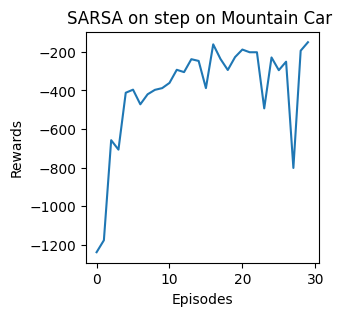

In [ ]:
plt.figure(figsize=(3, 3))

plt.plot(episode_rewards)
plt.ylabel("Rewards")
plt.xlabel("Episodes")
plt.title("SARSA one step on Mountain Car ")

plt.show()

#####Testing del modello ottenuto - esempio singolo

In [ ]:
env = gym.make("MountainCar-v0")

state = env.reset()
env._max_episode_steps = 800
done = False

i = 0

while not done:

    action = agent.epsilon_greedy(state, 0.0) # con epsilon=0.0 agisce greedy

    state, reward, done, _ = env.step(action[0])

    i += 1

    if done == True:
      print(f" - Terminal state occurs in\n   Step {i} -- State={state}")

env.close()

 - Terminal state occurs in
   Step 141 -- State=[0.5212139  0.03547214]


#####Testing del modello ottenuto - su mille campioni

In [ ]:
def test(env):

   state = env.reset()
   env._max_episode_steps = 700
   done = False

   i = 0

   while not done:

      action = agent.epsilon_greedy(state, 0.0) # con epsilon=0.0 agisce greedy

      state, reward, done, _ = env.step(action[0])

      i += 1


   return i

In [ ]:
env = gym.make("MountainCar-v0")
step_list = []

for j in range(1,1001):
  s = test(env)
  step_list.append(s)

env.close()


In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(step_list)
plt.ylabel("Step for Goal")
plt.xlabel("Episodes")

plt.show()

In [ ]:
count_less_than= 0
limit = 170

for number in step_list:
    if number <= limit:
        count_less_than += 1

percentage_less_than= (count_less_than / len(step_list)) * 100


print(f"Percentage of Step less than", limit,":\n", percentage_less_than, "%")

Percentage of Step less than 170 :
 24.9 %


#### Training with Imitation Learning

In [ ]:
class Agent_imit(Agent):

    def imit_step(self, reward, new_state, eps, done):
        if done:
            self.update_weights(reward, done)
        else:
            if new_state[1] > 0:
                new_action = [2]
            else:
                new_action = [0]

            new_feature_vector = get_feature_vector(new_state[0],
                                                    new_state[1],
                                                    new_action)
            self.update_weights(reward, done, new_feature_vector)
            self.feature_vector = new_feature_vector
            self.action = new_action
        return self.action



In [ ]:
def train_imit(environment, agent, epsilon, num_episodes=1_000):
    env = environment
    episode_rewards = []
    eps = epsilon

    print("\n\tImitation phase =")


    for episode in range(1,num_episodes+1):

        ob = env.reset()
        action = [np.random.choice(list_actions)]
        episode_rewards_sum = 0
        done = False
        count = 0

        while count < 3_000:
            count += 1

            if count == 3_000:
                done = True
            else:
                done = False

            new_ob, reward, done_env, _ = env.step(action[0])

            if new_ob[0] >= 0.5:
                #debug
                print(f"Goal episod = {episode}  Total reward={episode_rewards_sum}")
                count = 3_000

            episode_rewards_sum += reward

            if ( 1 <= episode <= num_episodes/3 ) :
              action = agent.imit_step(reward, new_ob, eps, done)
            else:
              action = agent.step(reward, new_ob, eps, done)

        # Per Gestire la dinamica di epsilon
        if (episode >= num_episodes/3) and (episode % (num_episodes/3) == 0):
           eps = round(eps - 0.1, 3)
           if episode != num_episodes:
              print("\n\tEpsilon =", eps)

        episode_rewards.append(episode_rewards_sum)

    save_params(agent.weights)
    print("\n...Params Saved...\n")
    env.close()
    print("\n...End of training...\n")

    return episode_rewards, agent

In [ ]:
agent2 = Agent_imit(param_vector_size=size_iht,
              learning_rate=(0.5/8),
              discount=0.9)


episode_rewards, agent2 = train_imit(gym.make("MountainCar-v0"), agent2, epsilon=0.3, num_episodes=30)


	Imitation phase =
Goal episod = 1  Total reward=-121.0
Goal episod = 2  Total reward=-162.0
Goal episod = 3  Total reward=-93.0
Goal episod = 4  Total reward=-88.0
Goal episod = 5  Total reward=-112.0
Goal episod = 6  Total reward=-121.0
Goal episod = 7  Total reward=-112.0
Goal episod = 8  Total reward=-113.0
Goal episod = 9  Total reward=-152.0
Goal episod = 10  Total reward=-121.0

	Epsilon = 0.2
Goal episod = 12  Total reward=-2210.0
Goal episod = 13  Total reward=-149.0
Goal episod = 14  Total reward=-195.0
Goal episod = 15  Total reward=-219.0
Goal episod = 16  Total reward=-375.0
Goal episod = 17  Total reward=-1376.0
Goal episod = 18  Total reward=-251.0
Goal episod = 19  Total reward=-317.0
Goal episod = 20  Total reward=-662.0

	Epsilon = 0.1
Goal episod = 21  Total reward=-439.0
Goal episod = 22  Total reward=-577.0
Goal episod = 23  Total reward=-325.0
Goal episod = 24  Total reward=-507.0
Goal episod = 25  Total reward=-223.0
Goal episod = 26  Total reward=-239.0
Goal ep

#####Testing del modello ottenuto - su mille campioni

In [ ]:
def test(env):

   state = env.reset()
   env._max_episode_steps = 700
   done = False

   i = 0

   while not done:

      action = agent2.epsilon_greedy(state, 0.0) # con epsilon=0.0 agisce greedy

      state, reward, done, _ = env.step(action[0])

      i += 1


   return i

In [ ]:
env = gym.make("MountainCar-v0")
step_list = []

for j in range(1,1001):
  s = test(env)
  step_list.append(s)

env.close()


In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(step_list)
plt.ylabel("Step for Goal")
plt.xlabel("Episodes")

plt.show()

In [ ]:
count_less_than= 0
limit = 170

for number in step_list:
    if number <= limit:
        count_less_than += 1

percentage_less_than= (count_less_than / len(step_list)) * 100


print(f"Percentage of Step less than", limit,":\n", percentage_less_than, "%")

Percentage of Step less than 170 :
 60.5 %
